# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '.\\data\\train.p'
testing_file = '.\\data\\test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
#mp X_train, y_train = train['features'], train['labels']
#mp X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np


# TODO: Number of training examples
n_train = len(train['features']) #ok
# TODO: Number of testing examples.
n_test = len(test['features']) #ok

# TODO: What's the shape of an traffic sign image?
image_shape_train = train['sizes'][0] # unclear what to do here in detail. The shape of the first image is returned
image_shape_train_features = train['features'][0].shape # unclear what to do here in detail. The shape of the first image is returned

# TODO: How many unique classes/labels there are in the dataset.
n_classes_train = len(np.unique(train['labels'])) #ok
n_classes_test = len(np.unique(test['labels'])) #ok

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape (train object sizes 0) =", image_shape_train)
print("Image data shape (train object features 0) =", image_shape_train_features)
print(np.unique(train['labels']))
print("Number of training classes =", n_classes_train)
print(np.unique(test['labels']))
print("Number of testing classes =", n_classes_test)


Number of training examples = 39209
Number of testing examples = 12630
Image data shape (train object sizes 0) = [29 30]
Image data shape (train object features 0) = (32, 32, 3)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Number of training classes = 43
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Number of testing classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

7
(32, 32, 3)


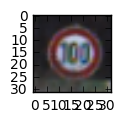

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(test['features']))
image = test['features'][index]

plt.figure(figsize=(1,1))
#plt.imshow(image, cmap="gray")
plt.imshow(image)
print(test['labels'][index])
print(image.shape)

The following code block contains some "playing code" to understand the input data better. The project does not need this code block.

In [6]:
### some test functions to understand the input data better

i=50
print(test['labels'][i])
print(type(test['labels'][i]))
print(test['sizes'][i])
print(test['coords'][i])
print("x-extension: ", (train['coords'][i][2]-train['coords'][i][0]) / train['sizes'][i][0])
print("y-extension: ", (train['coords'][i][3]-train['coords'][i][1]) / train['sizes'][i][1])

print(len(test['sizes']))
print(len(test['features']))
print(len(train['sizes']))
print(len(train['features']))
print(train['sizes'][i])
print(test['features'][3].shape)

      


25
<class 'numpy.uint8'>
[27 27]
[ 5  5 22 22]
x-extension:  0.744186
y-extension:  0.767442
12630
12630
39209
39209
[43 43]
(32, 32, 3)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

38


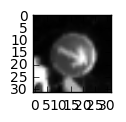

In [7]:
# In this code block the training images will be transformed into 
# gray-scale images. Each image can later on be represented as a 32x32 
# feature vector
# Input: train['features']
# Output: gray_train_features
# Author: Martin Pfeifle

import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

def grayscale(img): # copy from lane detection program
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_train_features  = np.zeros((len(train['features']),32,32))
for i in range(len(train['features'])):
    gray_train_features[i] = grayscale (train['features'][i])

#Test - Depict one gray training image
index = random.randint(0, len(gray_train_features))
image = gray_train_features[index]

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(train['labels'][index])

14


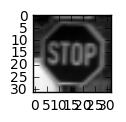

In [8]:
# In this code block the testing images will be transformed into 
# gray-scale images of size 32x32. Each image can later on be represented as a 32x32 
# feature vector. Both normalization and grayscale is done for the test images
# in this function.
# Input: test['features']
# Output: gray_test_features
# Author: Martin Pfeifle

import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

def grayscale(img): # copy from lane detection program
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_test_features  = np.zeros((len(test['features']),32,32))
for i in range(len(test['features'])):
    gray_test_features[i] = grayscale (test['features'][i])

#Test - Depict one gray test image
index = random.randint(0, len(gray_test_features))
image = gray_test_features[index]

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(test['labels'][index])

The following code block creates
* X_train
* y_train
* X_Validation
* y_valdiation
* X_test
* y_test

The idea is that X_train and X_Validation contain data in a 2-dimensional matrix (number of train images, 1024). So each image is represented as a 1024 dimensional feature vector. y_train and y_validation contain the corresponding class values.

X_test and y_test have the same format as the training and validation data. These test data are not used during training. 

In [9]:
from sklearn.utils import shuffle

X_train = np.empty([len(gray_train_features),1024])
for i in range(len(X_train)):
    X_train[i]=np.reshape(gray_train_features[i],1024)
y_train = train['labels']

X_validation, y_validation = X_train, y_train

X_test = np.empty([len(gray_test_features),1024])
for i in range(len(X_test)):
    X_test[i]=np.reshape(gray_test_features[i],1024)
y_test = test['labels']

X_train, y_train = shuffle(X_train, y_train)

In [10]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 50

The parameter *x* for LeNet is a 1024-dimensional feature vector which is first transformed into a 32x32 image  

In [11]:
from tensorflow.contrib.layers import flatten

def LeNet(x):
    # Reshape from 2D to 4D. This prepares the data for
    # convolutional and pooling layers.
    x = tf.reshape(x, (-1, 32, 32, 1))
    # Pad 0s to 32x32. Centers the digit further.
    # Add 2 rows/columns on each side for height and width dimensions.
    # mp: was commented out. strangely enough it was working with padding although the  input is already 32x32 
    # x = tf.pad(x, [[0, 0], [2, 2], [2, 2], [0, 0]], mode="CONSTANT")
    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Convolution Layer 1. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation 1.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling Layer 1. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Convolution Layer 2. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation 2.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling Layer 2. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten Layer.
    fc1 = flatten(conv2)
    fc1_shape = (fc1.get_shape().as_list()[-1], 120)
    
    # SOLUTION: Fully Connected Layer 1. Input = 5x5x16. Output = 120.
    fc1_W     = tf.Variable(tf.truncated_normal(shape=(fc1_shape), mean = mu, stddev = sigma))
    fc1_b     = tf.Variable(tf.zeros(120))
    fc1       = tf.matmul(fc1, fc1_W) + fc1_b
    
    # SOLUTION: Activation 3.
    fc1 = tf.nn.relu(fc1)

    # SOLUTION: Fully Connected Layer 2. Input = 120. Output = 43.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 43), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc1, fc2_W) + fc2_b
    return logits

In [12]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy, total_loss = 0, 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy =  sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * batch_x.shape[0])
        total_loss     += (loss * batch_x.shape[0])
    return total_loss / num_examples, total_accuracy / num_examples

In [13]:
x = tf.placeholder(tf.float32, (None, 1024))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [14]:
logits = LeNet(x)
loss_operation = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y))
optimizer = tf.train.AdamOptimizer()
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [31]:
import numpy as np

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)    
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    # Important so that in each Epoch run examples from all traffic sign classes are used    
    X_train, y_train = shuffle(X_train, y_train)
    print("Training...")
    print()
    for i in range (EPOCHS):
        X_validation_epoch_run = X_train[int(i*0.1*num_examples): int((i+1)*0.1*num_examples)]
        y_validation_epoch_run = y_train[int(i*0.1*num_examples): int((i+1)*0.1*num_examples)]
        
        X_train_epoch_run_1 = X_train[0: int(i*0.1*num_examples)]
        X_train_epoch_run_2 = X_train[int((i+1)*0.1*num_examples)+1:num_examples] 
        X_train_epoch_run = np.concatenate ((X_train_epoch_run_1,X_train_epoch_run_2))
        
        y_train_epoch_run_1 = y_train[0: int(i*0.1*num_examples)]
        y_train_epoch_run_2 = y_train[int((i+1)*0.1*num_examples)+1:num_examples] 
        y_train_epoch_run = np.concatenate ((y_train_epoch_run_1,y_train_epoch_run_2))
        
        X_train_epoch_run, y_train_epoch_run = shuffle(X_train_epoch_run, y_train_epoch_run)
        for offset in range(0, len(X_train_epoch_run), BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_epoch_run[offset:end], y_train_epoch_run[offset:end]
            loss = sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_loss, validation_accuracy = evaluate(X_validation_epoch_run, y_validation_epoch_run)
        print("EPOCH {} ...".format(i+1))
        print("Validation Loss     = {:.3f}".format(validation_loss))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        saver.save(sess, '.\lenet',global_step=i)
        print("Model saved ", i)
        print()

Training...

EPOCH 1 ...
Validation Loss     = 0.460
Validation Accuracy = 0.876
Model saved  0

EPOCH 2 ...
Validation Loss     = 0.215
Validation Accuracy = 0.947
Model saved  1

EPOCH 3 ...
Validation Loss     = 0.152
Validation Accuracy = 0.965
Model saved  2

EPOCH 4 ...
Validation Loss     = 0.134
Validation Accuracy = 0.966
Model saved  3

EPOCH 5 ...
Validation Loss     = 0.088
Validation Accuracy = 0.977
Model saved  4

EPOCH 6 ...
Validation Loss     = 0.120
Validation Accuracy = 0.970
Model saved  5

EPOCH 7 ...
Validation Loss     = 0.151
Validation Accuracy = 0.960
Model saved  6

EPOCH 8 ...
Validation Loss     = 0.078
Validation Accuracy = 0.977
Model saved  7

EPOCH 9 ...
Validation Loss     = 0.038
Validation Accuracy = 0.990
Model saved  8

EPOCH 10 ...
Validation Loss     = 0.055
Validation Accuracy = 0.988
Model saved  9



In [32]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet-9.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    test_loss, test_accuracy = evaluate(X_test, y_test)
    print("Test Loss     = {:.3f}".format(test_loss))
    print("Test Accuracy = {:.3f}".format(test_accuracy))


Test Loss     = 0.822
Test Accuracy = 0.911


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

* The coloured training and testing traffic sign immages were transformed into gray images by using OpenCV cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), i.e. an image is transformed from (32x32x3) to (32x32x1)
* Botht the training and testing data were transformed into a one dimensional feature vector, i.e. a transformation from (32x32x1) to (1240x1)
* Based on this techique the LeNet code from LeNet-Lab could be used by only  a simple change, i.e. removal of the first padding step.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

* The input data were already divided into training and test data
* The given ratio between test/(test+training) was 12630 / (12630+39209) which fits quite well to the 20%-rule of thumb mentioned in the course.
* The concept of cross-validation was applied for the training set. In each of the 10-runs, 10% of the training data were used for validation and 90% for the training. In the first epoch, the validation set contained the first 10% of the training data, in the 2nd epoch it contained training data from 10-20%, etc.
* Epochs was set to 10 as there seems no big accuracy improvement any more after Epoch 6. The Epochs value could be reduced.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The model was exactly the same one as used in the LetNet-Lab except that the first padding step which enlarged the images from 28x28 to 32x32 was skipped as the traffic signs were already of size 32x32. So the following steps were carried out:
* Convolution Layer with Input = 32x32x1 and Output = 28x28x6.
* Activation with relu
* Pooling Layer with Input = 28x28x6 and Output = 14x14x6.
* Convolution Layer with Output = 10x10x16
* Activation with relu 
* Pooling Layer with Input = 10x10x16 and Output = 5x5x16.
* Flatten Layer from 5x5x16 to 400x1 
* Fully Connected Layer with Input =400 and Output = 120.
* Activation with relu
* Fully Connected Layer with Input = 120 and Output = 43

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

The parameters were the same as in LetNet-Lab project:
* Epoch: 10
* Batch Size: 50
* distribution parameters for initial weights:  mu = 0 and sigma = 0.1
* intial bias values were set to 0

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

The taken approach was to use the already existing LeNet-5 architecture model which is working well for the MNIST data set. As traffic sign classification basically depend on the recognition of shapes and numbers inside the signs, the images were first transformed into gray scale images which allows to handle them in the same way as the MNIST data. 

The parameters used in this project were the same as in LetNet-Lab project:
* Epoch: 10
* Batch Size: 50
* distribution parameters for initial weights:  mu = 0 and sigma = 0.1
* intial bias values were set to 0

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [33]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from PIL import Image
%matplotlib inline

In [34]:
#reading in an image

def grayscale(img): # copy from lane detection program
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def readImage(str):
    img=Image.open(str)
    image=np.array(img.resize((32, 32)))
    #print(image.shape)
    image=grayscale(image)
    #print(image.shape)
    #print (image[0])
    return image
    #print(image.shape)
    #plt.imshow(image,cmap='gray')

def readFeatureVector(str):
    image=readImage(str)
    return np.reshape(image,1024)

In [35]:
# initialising the X_myValues and y_myValues structure. 
# X_myValues contain own traffic signs
# y_myValues contain the corresponding traffic sign class information

X_myValues = np.zeros((6,1024), dtype=np.float64)
y_myValues = np.ones((6), dtype=np.uint8)
y_myValues[0]=1
y_myValues[1]=2
y_myValues[2]=4
y_myValues[3]=5
y_myValues[4]=5
y_myValues[5]=12
for i in range(6):
    X_myValues[i]=np.reshape(readFeatureVector('./my_signs/image_{}.jpg'.format(i)),1024)

In [36]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet-9.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    test_loss, test_accuracy = evaluate(X_myValues, y_myValues)
    print("Test Loss     = {:.3f}".format(test_loss))
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Loss     = 6.602
Test Accuracy = 0.500


In [37]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet-9.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    result =  sess.run(logits, feed_dict={x: X_myValues})
    print(result)
    print()
    for i in range (6):
        print (softmax(result[i]))
    print()
    print(sess.run(tf.nn.top_k(result, k=3)))    
print ('done')

[[ -1.24178610e+01   6.33209877e+01  -2.07917347e+01  -3.63661156e+01
   -1.12878628e+01   4.83860111e+00  -6.00744677e+00  -3.68789291e+01
   -5.34041557e+01  -6.41721420e+01  -6.60774765e+01  -2.40326405e+01
   -5.59031944e+01  -6.70613480e+01  -5.22431135e+00  -8.02016678e+01
   -3.85466843e+01  -7.84997787e+01  -5.22529945e+01  -9.31870193e+01
   -7.05124359e+01  -2.96707134e+01  -1.01518539e+02  -6.19605522e+01
   -9.36485214e+01  -7.14719925e+01  -6.06659851e+01  -7.80925446e+01
   -3.11316719e+01  -4.44823074e+01  -6.18361511e+01  -3.77601662e+01
   -5.02837410e+01  -7.20320587e+01  -8.78677444e+01  -4.86011009e+01
   -7.54650726e+01  -5.82261086e+01  -3.40980453e+01  -3.93261566e+01
   -3.09750233e+01  -7.38188629e+01  -7.21383896e+01]
 [ -1.08160210e+00   1.88094597e+01   6.61503983e+00  -4.20766525e+01
    6.37413883e+00   3.32592249e+00  -5.06124115e+01  -9.36838818e+00
   -2.20785809e+01  -1.20761366e+01  -4.02682228e+01  -5.27104340e+01
   -6.37469292e+01  -3.24300652e+01 

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The network detected 4 out of 6 signs correctly (After re-running the training again only 3 out of 6 images were classified correctly; seems to depend on the random weights at the beginning). The correctly detected signs are all detected with a probability close to 1. 

The model detected the 80 signs incorrectly. Instead it detected a 30 km speed limit sign. As *8 and 3 are similar* to each other and there are slightly more 30 signs are in the training set, this error can be explained.

In addition the normal 80 sting was ranked 2nd (after the 30 sign) whereas the 80 sign with a *km* string attached was not under the top 3 suggestions
(cf. image below)

eighty: {} 1860
thirty: {} 2220


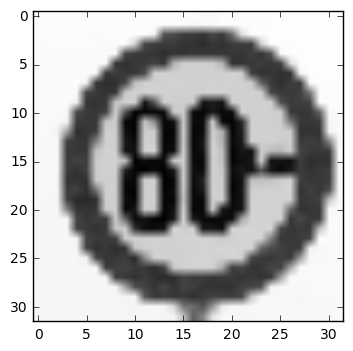

In [65]:
thirty = 0
eighty = 0
for i in range(len(train['labels'])):
    if (train['labels'][i] == 1):
        thirty = thirty + 1
    if (train['labels'][i] == 5):
        eighty = eighty + 1
print ('eighty: {}', eighty)  
print ('thirty: {}', thirty)  
plt.imshow(readImage('./my_signs/image_3.jpg'), cmap='gray') 

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

4 out of 6 images were recognized correctly
From the two images which were not recognized correctly, one was on 3rd position and one on the 4th position of the ordered prediction list. Strangely enough if I retrain the model with exactly the same paramaters, the resulting model is slightly different. Again it detects 4 out of the 6 images correctly but this time different images. As the only thing which changed are the initial randomly assigned weights, the whole model seems to be a little too dependent on this random values. One possibility to change this would be to set sigma to 0.


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

all information was provided already above. (cf. in[36])